
#Project_2A

##Projet de python pour la data-science, deuxième année de l'ENSAE

# DATA VISUALIZATION 

Dans cette partie, nous allons d'abord faire différentes observations sur les parties classées jouer en solo sur le jeux vidéos League of Legends.

In [1]:
#Divers bibliothèques pour manipuler et observer notre jeu de donnée
import pandas as pd
import matplotlib
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# On importe le data_set trouvée sur kaggle concernant des parties jouées sur le serveur NA (North America)
na_soloq = pd.read_csv('na_dataset.csv')

In [5]:
na_soloq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4552 entries, 0 to 4551
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Blue Mastery 1            4552 non-null   int64  
 1   Blue Mastery 2            4552 non-null   int64  
 2   Blue Mastery 3            4552 non-null   int64  
 3   Blue Mastery 4            4552 non-null   int64  
 4   Blue Mastery 5            4552 non-null   int64  
 5   Blue Masteries Avg        4552 non-null   float64
 6   Blue Masteries Median     4552 non-null   float64
 7   Blue Masteries Kurtorsis  4552 non-null   float64
 8   Blue Masteries Skewness   4552 non-null   float64
 9   Blue Masteries Std        4552 non-null   float64
 10  Blue Masteries Variance   4552 non-null   float64
 11  Blue Winrate 1            4552 non-null   float64
 12  Blue Winrate 2            4552 non-null   float64
 13  Blue Winrate 3            4552 non-null   float64
 14  Blue Win

Le data_set contient des informations sur 4552 parties jouées sur le serveur NA.
Il contient notamment des informations sur chaques joueurs de la partie comme le winrate (taux de victoire) ainsi que les masteries (score de temps de jeu du joueur sur le champion choisis en partie).
Il contient également des informations sur la répartition de ces valeurs dans l'équipe concernée.

In [6]:
#On transforme le data_set afin qu'il soit plus agéable à manipuler par la suite
na_soloq['Blue Won'] = na_soloq['Blue Won']==1 #turning 'blue won' into a bool variable
na_soloq['Red Won'] = na_soloq['Blue Won']==0 #creating a 'red_won variable
na_soloq['avg_win_dif'] = na_soloq['Blue Winrates Avg'] - na_soloq['Red Winrates Avg'] #creating an 'avg_winrate-dif' variable

In [7]:
na_soloq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4552 entries, 0 to 4551
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Blue Mastery 1            4552 non-null   int64  
 1   Blue Mastery 2            4552 non-null   int64  
 2   Blue Mastery 3            4552 non-null   int64  
 3   Blue Mastery 4            4552 non-null   int64  
 4   Blue Mastery 5            4552 non-null   int64  
 5   Blue Masteries Avg        4552 non-null   float64
 6   Blue Masteries Median     4552 non-null   float64
 7   Blue Masteries Kurtorsis  4552 non-null   float64
 8   Blue Masteries Skewness   4552 non-null   float64
 9   Blue Masteries Std        4552 non-null   float64
 10  Blue Masteries Variance   4552 non-null   float64
 11  Blue Winrate 1            4552 non-null   float64
 12  Blue Winrate 2            4552 non-null   float64
 13  Blue Winrate 3            4552 non-null   float64
 14  Blue Win

Il y a désormais une nouvelle variable 'Red_Won', et les variables de victoires/défaites sont booléennes désormais.
On a également ajouté une variable 'avg_win_dif' qui vaut la différence d'average winrate entre deux équipes.

In [11]:
na_soloq.head().describe()

,Blue Mastery 1,Blue Mastery 2,Blue Mastery 3,Blue Mastery 4,Blue Mastery 5,Blue Masteries Avg,Blue Masteries Median,Blue Masteries Kurtorsis,Blue Masteries Skewness,Blue Masteries Std,...,Red Winrate 3,Red Winrate 4,Red Winrate 5,Red Winrates Avg,Red Winrates Median,Red Winrates Kurtorsis,Red Winrates Skewness,Red Winrates Std,Red Winrates Variance,avg_win_dif
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,66831.200000,18961.400000,66800.000000,45193.800000,260472.600000,91651.800000,42148.600000,3.237879,1.511453,102503.549206,...,0.480862,0.348908,0.357089,0.438958,0.440800,0.976254,-0.182127,0.141826,0.023462,0.006259
std,81468.341398,31871.657304,78397.138612,48519.009545,225036.827864,54879.941526,43301.562931,1.109479,0.825918,80669.069229,...,0.051766,0.223395,0.188041,0.144271,0.157047,3.278081,1.293843,0.064686,0.019556,0.271849
min,3685.000000,1198.000000,8979.000000,981.000000,5037.000000,8935.400000,3685.000000,1.694611,0.072554,8217.305193,...,0.434783,0.000000,0.176471,0.213843,0.176471,-2.929853,-2.220568,0.073620,0.005420,-0.431737
25%,4133.000000,1821.000000,26882.000000,5563.000000,99490.000000,81393.600000,5037.000000,3.017505,1.692783,62699.539649,...,0.451613,0.268293,0.200000,0.417206,0.442308,-1.824953,-0.302154,0.105423,0.011114,-0.081736
50%,23117.000000,6819.000000,37405.000000,24707.000000,256284.000000,102685.000000,26882.000000,3.233748,1.783468,80900.461504,...,0.468085,0.437500,0.333333,0.441384,0.467320,1.914221,0.048294,0.108752,0.011827,0.136142
75%,117377.000000,9320.000000,57216.000000,93559.000000,363699.000000,104152.600000,75649.000000,3.439484,1.823128,141822.059505,...,0.481928,0.467320,0.442308,0.527823,0.550000,2.775487,0.227510,0.200966,0.040387,0.185553
max,185844.000000,75649.000000,203518.000000,101159.000000,577853.000000,161092.400000,99490.000000,4.804045,2.185332,218878.380179,...,0.567901,0.571429,0.633333,0.594533,0.567901,4.946368,1.336285,0.220367,0.048562,0.223074


In [12]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [29]:
fig_1 = px.histogram(na_soloq, x='Blue Winrates Avg', title='AvgWinrate distribution vs Game result, for Blue.',color='Blue Won')
fig_1.show()

In [28]:
fig_2 = px.histogram(na_soloq, x='Red Winrates Avg', title='AvgWinrate distribution vs Game result, for Red.',color='Red Won')
fig_2.show()

In [33]:
fig_3 = px.scatter(na_soloq.sample(2000),title='Avg Winrates vs Avg Masteries, for Blue',x='Blue Winrates Avg',y='Blue Masteries Avg',color='Blue Won')
fig_3.show()

In [35]:
fig_3 = px.scatter(na_soloq.sample(2000),title='Avg Winrates vs Avg Masteries, for Blue',x='Blue Masteries Avg',y='Blue Winrates Avg',color='Blue Won')
fig_3.show()

In [38]:
fig_4 = px.histogram(na_soloq, x='avg_win_dif', title='Win distribution vs Gmae Result, for Blue',color='Blue Won')
fig_4.show()

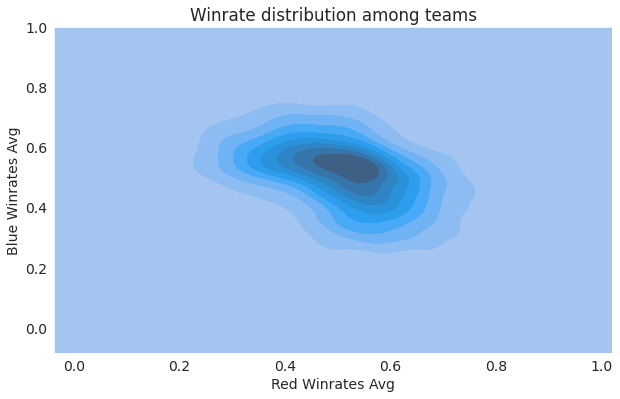

In [56]:
plt.title("Winrate distribution among teams")
sns.kdeplot(x=na_soloq['Red Winrates Avg'], y=na_soloq['Blue Winrates Avg'], fill=True, thresh=False);
plt.show()

In [50]:
na_soloq['Blue Winrates Avg']

0       0.626938
1       0.436917
2       0.553347
3       0.446087
4       0.162796
          ...   
4547    0.588568
4548    0.290909
4549    0.498261
4550    0.504541
4551    0.613470
Name: Blue Winrates Avg, Length: 4552, dtype: float64

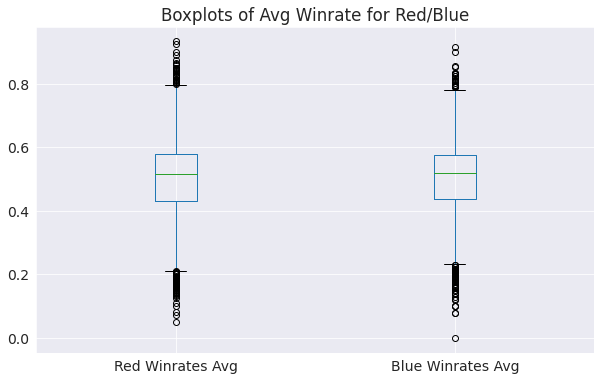

In [52]:
plt.title("Boxplots of Avg Winrate for Red/Blue")
boxplot_1 = na_soloq.boxplot(column=['Red Winrates Avg', 'Blue Winrates Avg'])
plt.show()

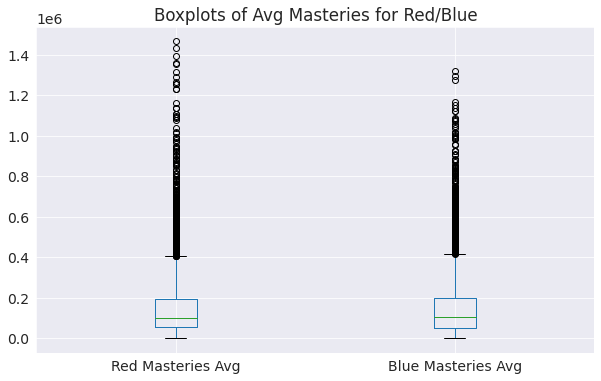

In [53]:
plt.title("Boxplots of Avg Masteries for Red/Blue")
boxplot_2 = na_soloq.boxplot(column=['Red Masteries Avg', 'Blue Masteries Avg'])
plt.show()